In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
dataset = pd.read_csv('Downloads/Spam.csv', encoding='latin-1')

In [3]:
dataset.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [4]:
dataset = dataset[['v1' , 'v2']]
dataset.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [5]:
dataset['v1'] = dataset['v1'].map({'ham':0 , 'spam':1})
dataset.head()

,v1,v2
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [6]:
dataset.isna().sum()

v1    0
v2    0
dtype: int64

<Axes: ylabel='count'>

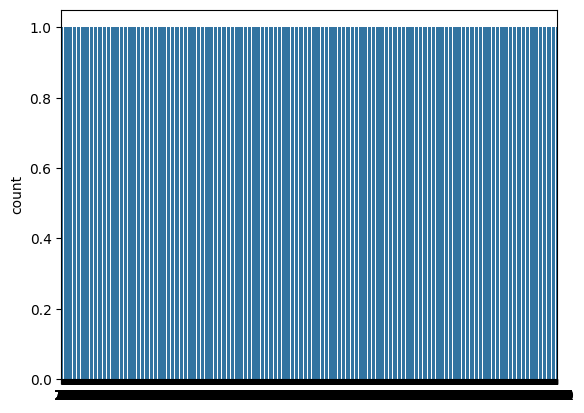

In [7]:
sns.countplot(dataset['v1'])

In [8]:
import re
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\hepsi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [9]:
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer

In [10]:
corpus = []

In [11]:
dataset['v2'][1]

'Ok lar... Joking wif u oni...'

In [12]:
for i in range(0 , len(dataset)):
  message = re.sub('[^a-zA-Z]' , ' ' , dataset['v2'][i])
  message = message.lower()
  message = message.split()
  ss = SnowballStemmer(language='english')
  message = [ss.stem(word) for word in message if not word in set(stopwords.words('english'))]
  message = ' '.join(message)
  corpus.append(message)

In [13]:
corpus[2]

'free entri wkli comp win fa cup final tkts st may text fa receiv entri question std txt rate c appli'

In [14]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
X = cv.fit_transform(corpus).toarray()
y = dataset.iloc[: , 0].values
     

In [15]:
X.shape

(5572, 6216)

In [16]:
y

array([0, 0, 1, ..., 0, 0, 0], dtype=int64)

In [17]:
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(X , y, test_size = 0.2 , random_state = 0)

In [18]:
x_train.shape

(4457, 6216)

In [19]:
x_test.shape

(1115, 6216)

In [20]:
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB()
classifier.fit(x_train , y_train)     

MultinomialNB()

In [21]:
y_pred = classifier.predict(x_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

[[933  16]
 [  6 160]]


<Axes: >

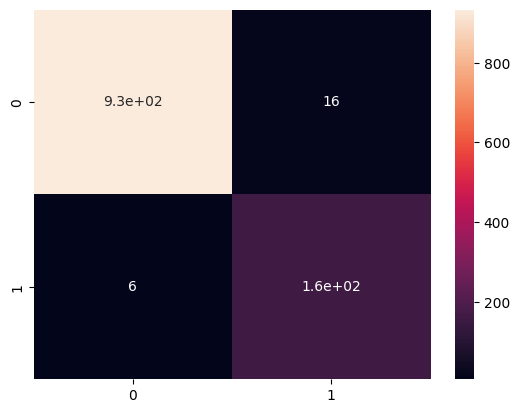

In [33]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test , y_pred)
print(cm)
sns.heatmap(cm , annot=True)

In [23]:
from sklearn.metrics import precision_score , recall_score
print(precision_score(y_test , y_pred)*100)
print(recall_score(y_test , y_pred)*100)
     

90.9090909090909
96.3855421686747


In [24]:
txt = 'please keep always smile' 

In [25]:
txt = np.array([txt])

In [26]:
txt = cv.transform(txt)

In [27]:
classifier.predict(txt)  

array([0], dtype=int64)

In [28]:
import pickle

In [29]:
pickle.dump(classifier , open('model.pkl' , 'wb'))

In [30]:
pickle.dump(cv , open('vector.pkl' , 'wb'))

In [31]:
import warnings
warnings.simplefilter(action ='ignore' , category=FutureWarning)

In [34]:
# importing the essential libraries
from flask import Flask, render_template, request
import pickle
import numpy as np
from werkzeug.serving import run_simple

# loading the saved models
try:
    model = pickle.load(open('model.pkl', 'rb'))
    cv = pickle.load(open('vector.pkl', 'rb'))
    print("Model and vectorizer loaded successfully.")
except Exception as e:
    print(f"Error loading model or vectorizer: {e}")
    raise

# creating flask instance
app = Flask(__name__)

# home page flask code
@app.route('/')
def home():
    return render_template('home.html')

# prediction page flask code
@app.route('/predict', methods=['POST'])
def predict():
    try:
        # Get the message from the form
        message = request.form['text']
        
        # Validate input
        if not message:
            return render_template('result.html', prediction="No text provided")
        
        # Transform input data
        data = [message]
        data = cv.transform(data).toarray()
        
        # Make prediction
        pred = model.predict(data)
        
        # Map prediction to human-readable form (optional)
        prediction_text = "Positive" if pred[0] == 1 else "Negative"
        
        return render_template('result.html', prediction=prediction_text)
    
    except Exception as e:
        return render_template('result.html', prediction=f"Error: {e}")

# Running the flask app
if __name__ == '__main__':
    run_simple('localhost', 5000, app, use_reloader=True, use_debugger=True)


 * Running on http://localhost:5000
Press CTRL+C to quit
 * Restarting with stat


Model and vectorizer loaded successfully.


SystemExit: 1

C:\Users\hepsi\AppData\Roaming\Python\Python311\site-packages\IPython\core\interactiveshell.py:3585: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [32]:


#importing the essential libraries
from flask import Flask , render_template , request
import pickle
import numpy as np

#loading the saved models
model = pickle.load(open('model.pkl' , 'rb'))
cv = pickle.load(open('vector.pkl' , 'rb'))

#creating flask instance
app = Flask(__name__)

#home page flask code
@app.route('/')
def home():
  return render_template('home.html')


#prediction page flask code
@app.route('/predict' , methods=['POST'])
def predict():
  message = request.form['text']
  data = [message]
  data = cv.transform(data).toarray()
  pred = model.predict(data)
  return render_template('result.html' , prediction = pred)


#Running the flask app
if __name__ == '__main__':
  app.run(debug=True)

 * Serving Flask app '__main__'
 * Debug mode: on


 * Running on http://127.0.0.1:5000
Press CTRL+C to quit
 * Restarting with stat


SystemExit: 1

C:\Users\hepsi\AppData\Roaming\Python\Python311\site-packages\IPython\core\interactiveshell.py:3585: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [35]:
exit